In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sembuh dari covid berkat obat A
treatment = [ 28.44,  32.32,  31.22,  29.58,  30.34,  30.76,  29.21,  30.4 ,
              31.12,  31.78,  27.58,  31.57,  35.73,  30.43,  30.31,  30.32,
              29.18,  29.52,  29.22,  31.56]

# sembuh dari covid tanpa obat A
control = [ 33.51,  30.63,  32.38,  32.52,  29.41,  30.93,  49.78,  28.96,
            35.77,  31.42,  30.76,  30.6 ,  23.64,  30.54,  47.78,  31.98,
            34.52,  32.42,  31.32,  40.72]

# Hypotesis
H0 : Tidak ada perbedaan signifikan antara pemberian obat A ataupun tidak dakam penyembuhan covid-19

H1 : Ada perbedaan diantara keduanya

--------

H0 : m1 = m2 -> m1 - m2 = 0

H1 : m1 != m2 -> m1 - m2 != 0

In [3]:
# hitung selisih data sample / ground truth
ground_truth = np.abs(np.mean(treatment) - np.mean(control))
ground_truth

2.9499999999999993

In [4]:
#gabung data
concat = np.concatenate([treatment,control])
concat

array([28.44, 32.32, 31.22, 29.58, 30.34, 30.76, 29.21, 30.4 , 31.12,
       31.78, 27.58, 31.57, 35.73, 30.43, 30.31, 30.32, 29.18, 29.52,
       29.22, 31.56, 33.51, 30.63, 32.38, 32.52, 29.41, 30.93, 49.78,
       28.96, 35.77, 31.42, 30.76, 30.6 , 23.64, 30.54, 47.78, 31.98,
       34.52, 32.42, 31.32, 40.72])

In [5]:
#list baru dari selisih hasil resample
diff = []
p = 100
np.random.seed(46) # reproduciable

for i in range(p):
    #acak data concat
    np.random.shuffle(concat)
    #ambil 20 data pertama sebagai treatment
    treatment_p = concat[:20]
    #ambil sebagai control
    control_p = concat[20:]
    #hitung selisih rata-rata absolut
    d = np.abs(np.mean(treatment_p) - np.mean(control_p))
    diff.append(d)

In [6]:
diff

[0.9739999999999931,
 1.0570000000000022,
 0.21800000000000352,
 0.3240000000000052,
 0.5629999999999917,
 0.5920000000000094,
 1.0920000000000094,
 2.3389999999999915,
 0.22099999999999653,
 0.9759999999999991,
 0.9179999999999993,
 0.3819999999999979,
 1.291999999999998,
 1.1349999999999945,
 0.26800000000000423,
 0.6489999999999974,
 1.8830000000000062,
 0.02500000000000213,
 0.06699999999999307,
 0.39399999999999125,
 2.45999999999999,
 2.078000000000003,
 0.43800000000000594,
 3.3910000000000053,
 0.13700000000000045,
 0.8850000000000016,
 1.2580000000000062,
 0.1869999999999905,
 2.033999999999992,
 2.872999999999994,
 1.2709999999999937,
 0.8359999999999985,
 2.3220000000000063,
 0.5919999999999987,
 0.3419999999999952,
 1.6619999999999955,
 0.9050000000000011,
 1.5820000000000043,
 2.248000000000001,
 1.284999999999993,
 0.7360000000000078,
 2.449000000000005,
 0.7909999999999968,
 0.4229999999999947,
 1.4070000000000107,
 0.8369999999999997,
 0.8339999999999961,
 3.00300000000

In [7]:
np.where(diff >= ground_truth)[0]

array([23, 47], dtype=int64)

In [8]:
p_value = len(np.where(diff >= ground_truth)[0]) / p
p_value

0.02

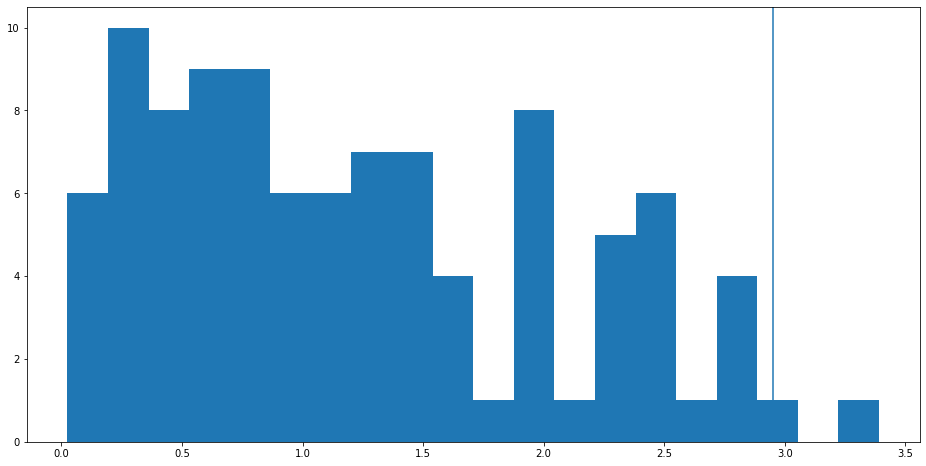

In [9]:
plt.figure(1, figsize=(16,8))
plt.hist(diff, bins=20)
plt.axvline(x=ground_truth)

Distribusi Normal

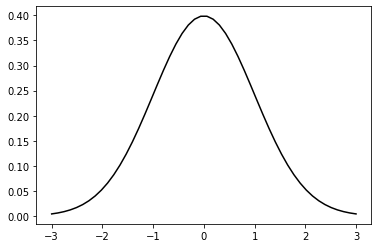

In [12]:
from scipy.stats import norm

# pdf normal
x = np.linspace(-3, 3)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k')

(array([ 1.,  1.,  2.,  2.,  5.,  4., 13., 12., 16., 12., 18., 21., 18.,
        17., 28., 15., 17.,  6., 11., 15.,  9.,  2.,  2.,  1.,  2.]),
 array([142.54941143, 144.64370129, 146.73799115, 148.83228101,
        150.92657087, 153.02086072, 155.11515058, 157.20944044,
        159.3037303 , 161.39802016, 163.49231001, 165.58659987,
        167.68088973, 169.77517959, 171.86946945, 173.9637593 ,
        176.05804916, 178.15233902, 180.24662888, 182.34091874,
        184.4352086 , 186.52949845, 188.62378831, 190.71807817,
        192.81236803, 194.90665789]),
 <BarContainer object of 25 artists>)

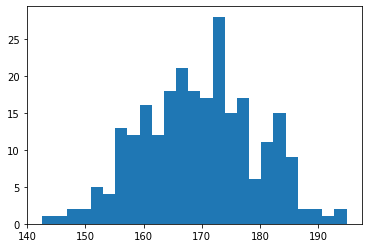

In [15]:
data = np.random.normal(170, 10, 250) #mean, std, banyak data
plt.hist(data, bins=25)

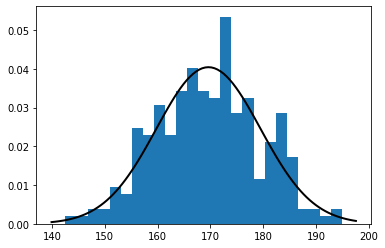

In [18]:
mu = data.mean()
std = data.std()

plt.hist(data, bins=25, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)